In [ ]:
import pandas as pd

df = pd.read_csv('./spamSMS.csv', encoding='ISO-8859-1')

In [ ]:
data = df['v2']
labels = df['v1']

print("data count:", len(data))

data count: 5572


In [ ]:
classes = pd.unique(labels)

c0 = len(labels[labels == classes[0]])
c1 = len(labels[labels == classes[1]])
print(f'{classes[0]} count: {c0} ({c0/ len(labels)}%)')
print(f'{classes[1]} count: {c1} ({c1/ len(labels)}%)')

ham count: 4825 (0.8659368269921034%)
spam count: 747 (0.13406317300789664%)


# CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(data)

# unique words with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# extract features
features = vectorizer.transform(data)
print(features.shape)

Vocabulary:  {'go': 3550, 'until': 8030, 'jurong': 4350, 'point': 5920, 'crazy': 2327, 'available': 1303, 'only': 5537, 'in': 4087, 'bugis': 1751, 'great': 3634, 'world': 8489, 'la': 4476, 'buffet': 1749, 'cine': 2048, 'there': 7645, 'got': 3594, 'amore': 1069, 'wat': 8267, 'ok': 5504, 'lar': 4512, 'joking': 4318, 'wif': 8392, 'oni': 5533, 'free': 3358, 'entry': 2949, 'wkly': 8447, 'comp': 2165, 'to': 7756, 'win': 8405, 'fa': 3087, 'cup': 2386, 'final': 3207, 'tkts': 7743, '21st': 411, 'may': 4930, '2005': 402, 'text': 7595, '87121': 784, 'receive': 6297, 'question': 6190, 'std': 7230, 'txt': 7933, 'rate': 6242, 'apply': 1156, '08452810075over18': 77, 'dun': 2802, 'say': 6633, 'so': 7024, 'early': 2823, 'hor': 3927, 'already': 1042, 'then': 7640, 'nah': 5238, 'don': 2712, 'think': 7660, 'he': 3781, 'goes': 3558, 'usf': 8075, 'lives': 4665, 'around': 1207, 'here': 3831, 'though': 7680, 'freemsg': 3365, 'hey': 3841, 'darling': 2443, 'it': 4218, 'been': 1460, 'week': 8313, 'now': 5420, 'a

# Train with SVM

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
print("train data shape:", X_train.shape)
print("test data shape:", X_test.shape)

train data shape: (3900, 8672)
test data shape: (1672, 8672)


## Grid Search

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}
svc = SVC()
grid_search_svm = GridSearchCV(svc, parameters)
grid_search_svm.fit(X_train, y_train)

print(sorted(grid_search_svm.cv_results_.keys()))

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_gamma', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


grid search best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best model evaluation
Test Accuracy: 0.978


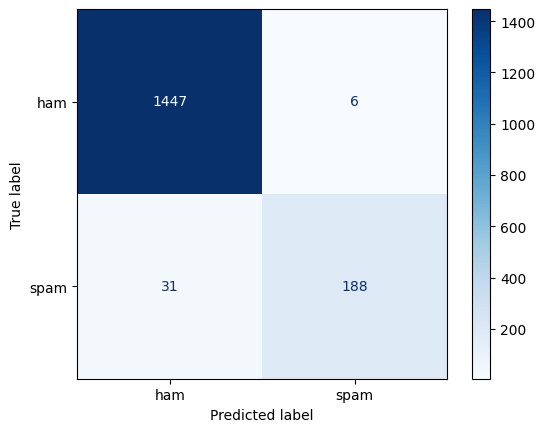

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", "{:.3f}".format(acc))

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=classes,
        cmap=plt.cm.Blues,
        )

    plt.show()

best_grid_param = grid_search_svm.best_params_
print("grid search best parameters:", best_grid_param)

best_grid_model = grid_search_svm.best_estimator_
print("Best model evaluation")
evaluate(best_grid_model, X_test, y_test)

SVM parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Test Accuracy: 0.982


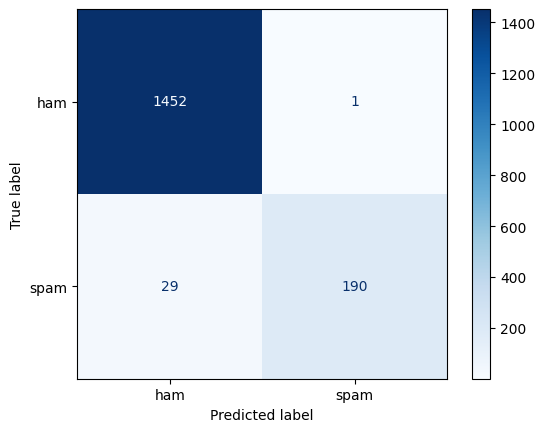

**************************************************
SVM parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.869


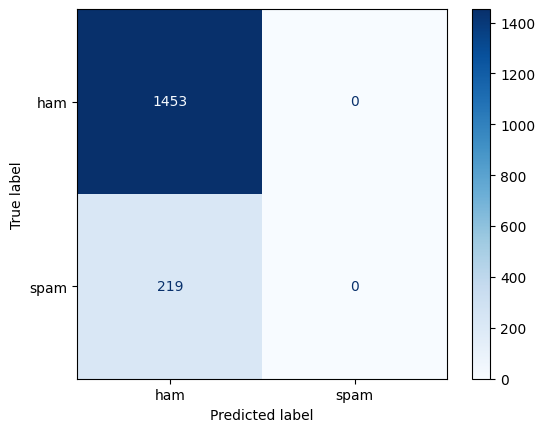

**************************************************
SVM parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Test Accuracy: 0.982


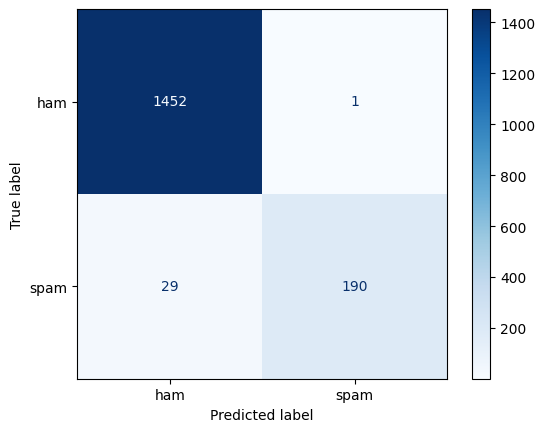

**************************************************
SVM parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Test Accuracy: 0.869


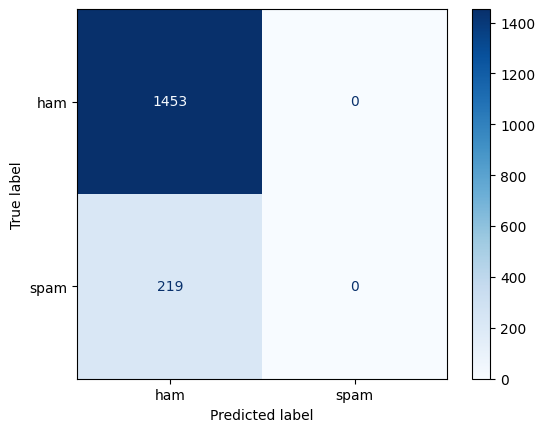

**************************************************
SVM parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'linear'}
Test Accuracy: 0.982


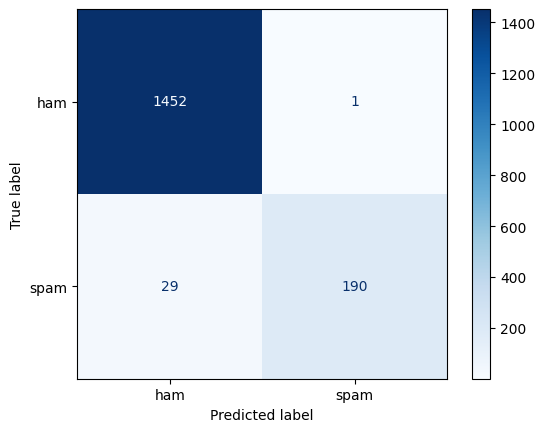

**************************************************
SVM parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
Test Accuracy: 0.869


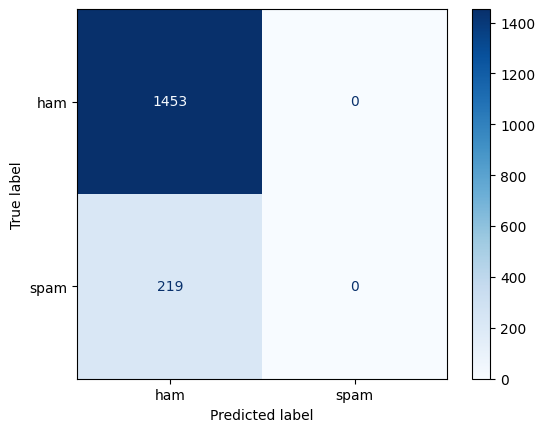

**************************************************
SVM parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Test Accuracy: 0.978


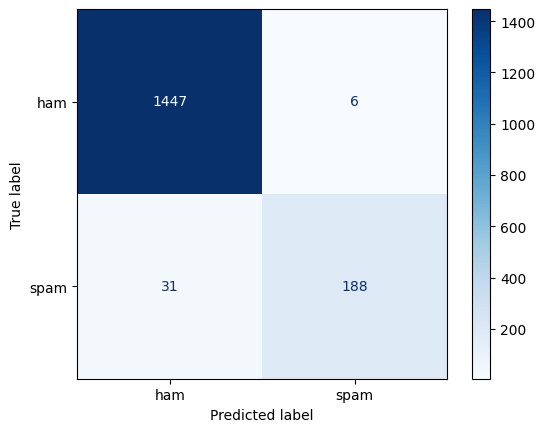

**************************************************
SVM parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.956


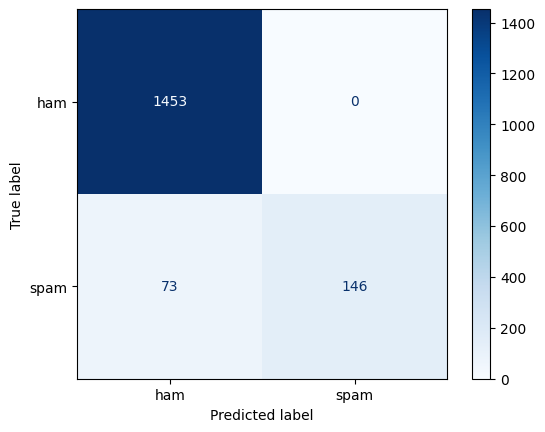

**************************************************
SVM parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Test Accuracy: 0.978


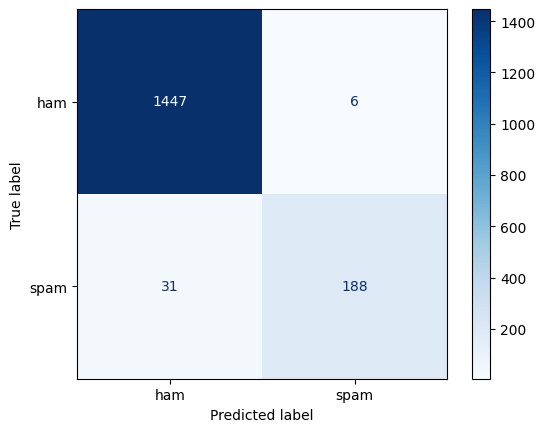

**************************************************
SVM parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Test Accuracy: 0.900


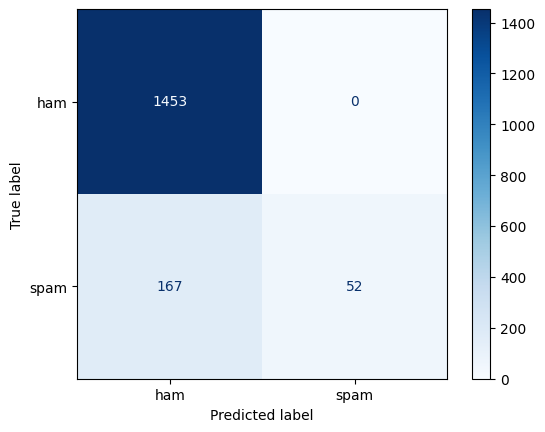

**************************************************
SVM parameters: {'C': 1, 'gamma': 10, 'kernel': 'linear'}
Test Accuracy: 0.978


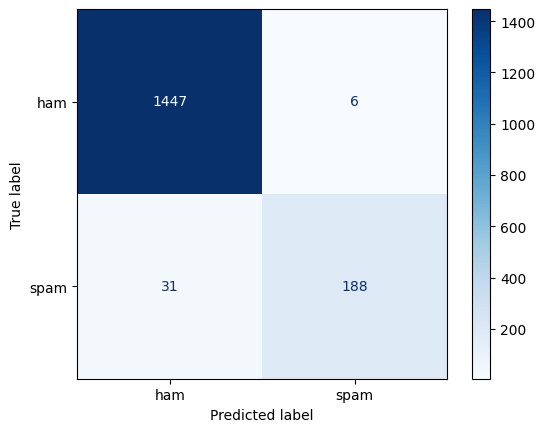

**************************************************
SVM parameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Test Accuracy: 0.900


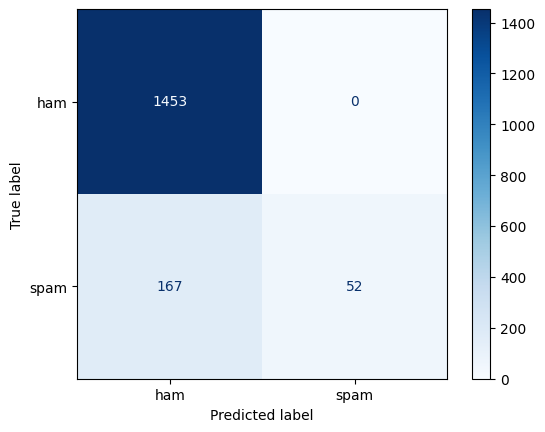

**************************************************
SVM parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Test Accuracy: 0.978


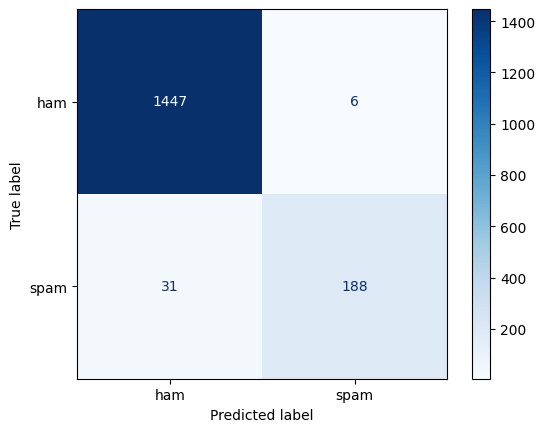

**************************************************
SVM parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.958


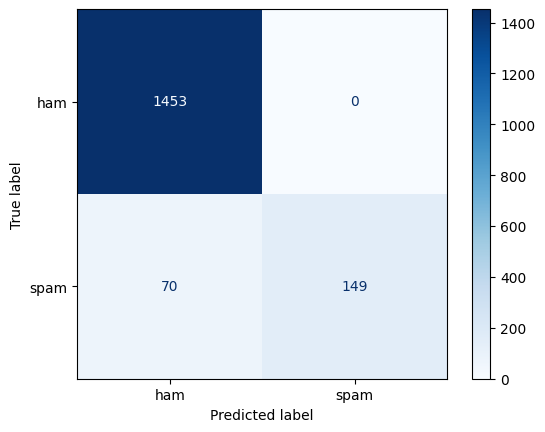

**************************************************
SVM parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Test Accuracy: 0.978


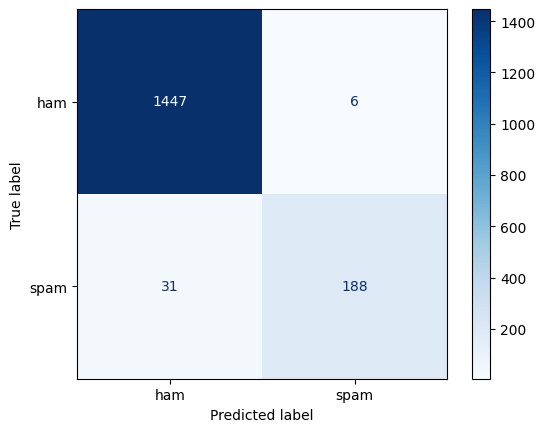

**************************************************
SVM parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Test Accuracy: 0.901


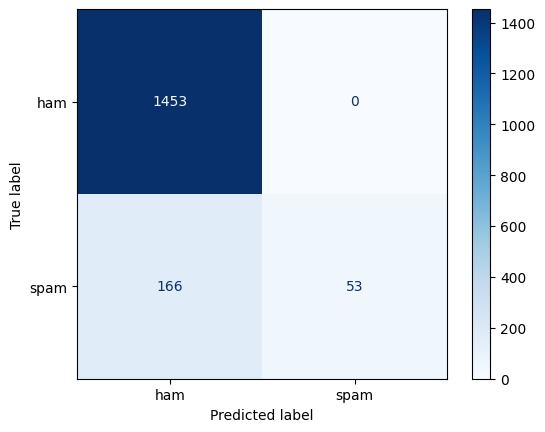

**************************************************
SVM parameters: {'C': 10, 'gamma': 10, 'kernel': 'linear'}
Test Accuracy: 0.978


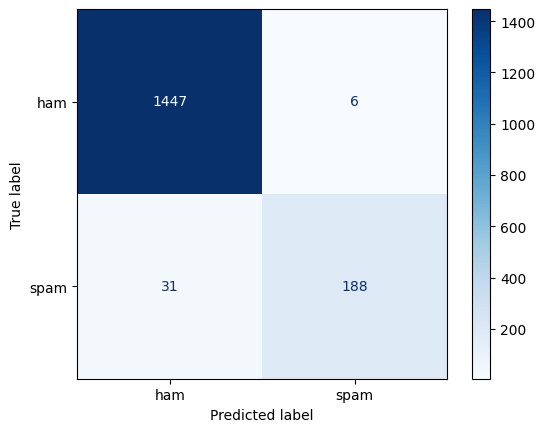

**************************************************
SVM parameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Test Accuracy: 0.900


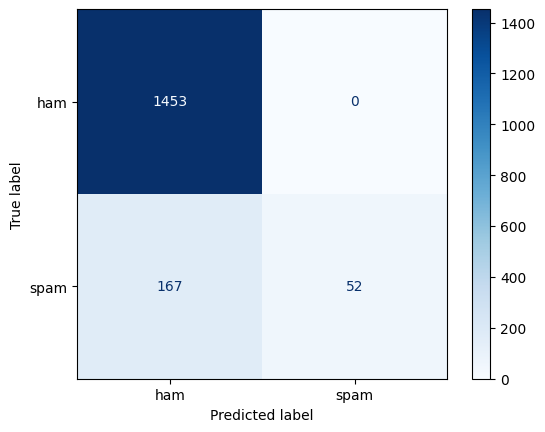

**************************************************


In [ ]:
# access all the parameters trained during the grid search
all_models_params = grid_search_svm.cv_results_['params']

# print all models accuracy and confusion matrix on test set
for param in all_models_params:
    model = SVC(**param)
    model.fit(X_train, y_train)
    print("SVM parameters:", param)
    evaluate(model, X_test, y_test)
    print('*'*50)

## Random Search

In [ ]:
svm_model = SVC()

parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}
random_search_svm = RandomizedSearchCV(svm_model, param_distributions=parameters, n_iter=10)
random_search_svm.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.1, 1, 10],
                                        'kernel': ['linear', 'rbf']})

random search best parameters: {'kernel': 'linear', 'gamma': 10, 'C': 1}
Best model evaluation
Test Accuracy: 0.978


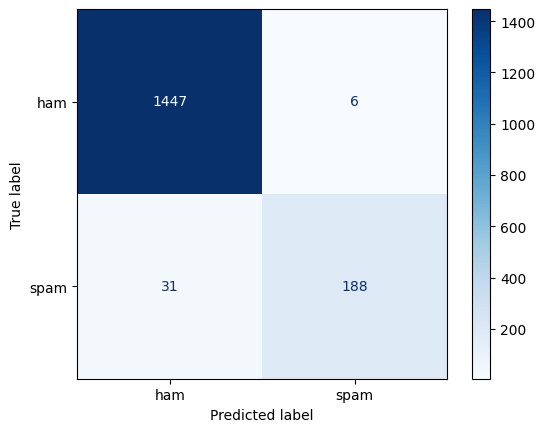

In [ ]:
best_random_param = random_search_svm.best_params_
print("random search best parameters:", best_random_param)

best_random_model = random_search_svm.best_estimator_
print("Best model evaluation")
evaluate(best_random_model, X_test, y_test)

SVM parameters: {'kernel': 'linear', 'gamma': 10, 'C': 10}
Test Accuracy: 0.978


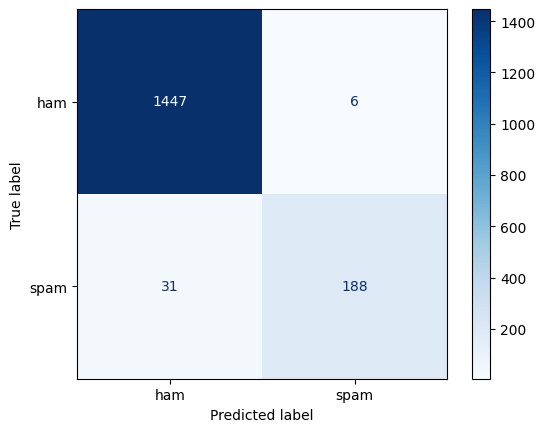

**************************************************
SVM parameters: {'kernel': 'linear', 'gamma': 10, 'C': 1}
Test Accuracy: 0.978


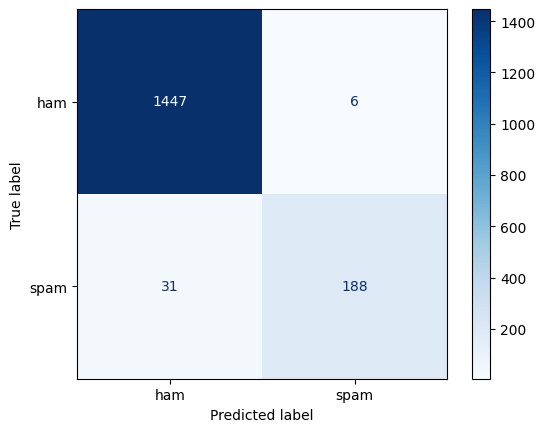

**************************************************
SVM parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}
Test Accuracy: 0.869


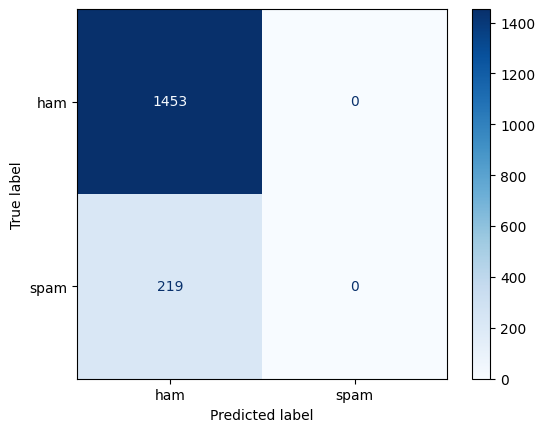

**************************************************
SVM parameters: {'kernel': 'rbf', 'gamma': 10, 'C': 1}
Test Accuracy: 0.900


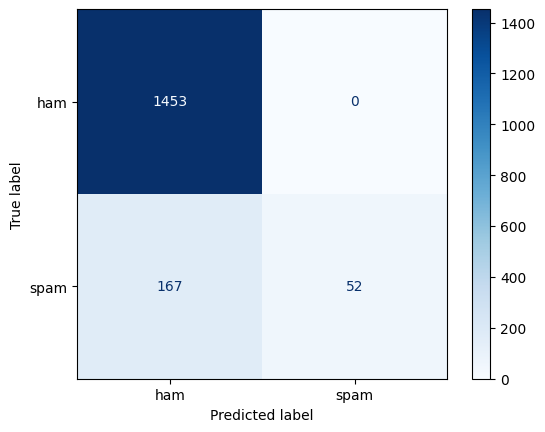

**************************************************
SVM parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
Test Accuracy: 0.978


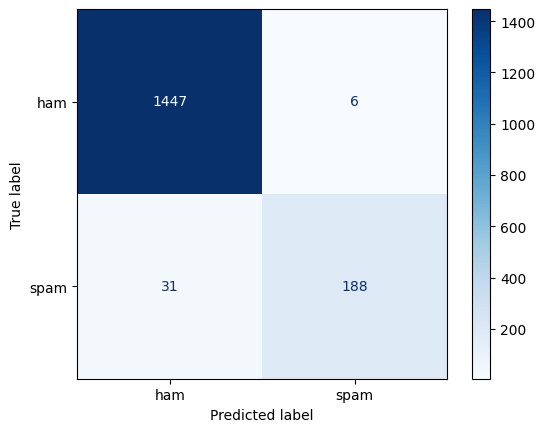

**************************************************
SVM parameters: {'kernel': 'rbf', 'gamma': 1, 'C': 10}
Test Accuracy: 0.901


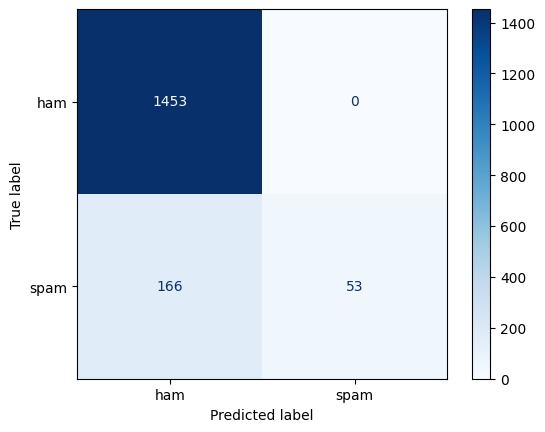

**************************************************
SVM parameters: {'kernel': 'rbf', 'gamma': 1, 'C': 1}
Test Accuracy: 0.900


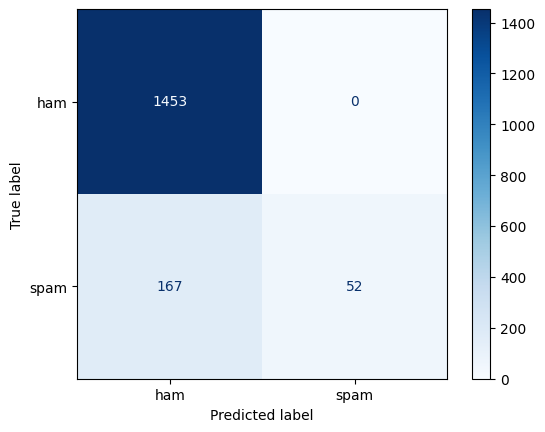

**************************************************
SVM parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}
Test Accuracy: 0.982


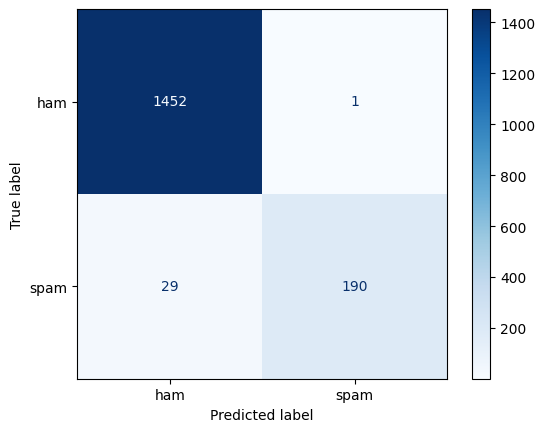

**************************************************
SVM parameters: {'kernel': 'rbf', 'gamma': 10, 'C': 10}
Test Accuracy: 0.900


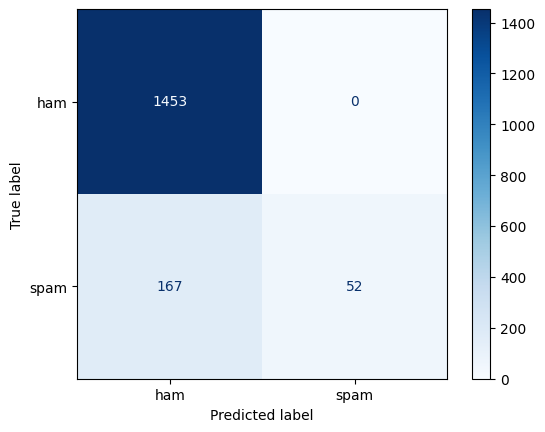

**************************************************
SVM parameters: {'kernel': 'linear', 'gamma': 1, 'C': 1}
Test Accuracy: 0.978


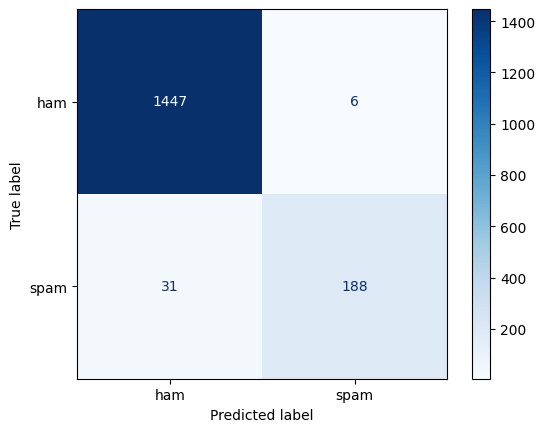

**************************************************


In [ ]:
all_models_params = random_search_svm.cv_results_['params']

# print all models accuracy and confusion matrix on test set
for param in all_models_params:
    model = SVC(**param)
    model.fit(X_train, y_train)
    print("SVM parameters:", param)
    evaluate(model, X_test, y_test)
    print('*'*50)